#Dekompresja

In [35]:
import os
import numpy as np
import pandas as pd
from skimage import color, io, measure
from matplotlib import pyplot as plt
from sklearn import metrics, preprocessing, linear_model


In [36]:
path = '/content/sample_photos'
images = {}
for root, dirs, files in os.walk(path):
    for file_name in files:
        if file_name.endswith((".jpg", ".jpeg", ".png")):
            image_path = os.path.join(root, file_name)
            image = io.imread(image_path)
            name, _ = os.path.splitext(file_name)
            images[name] = image

In [11]:
#Checking dict objects
images.keys()


dict_keys(['redPanda'])

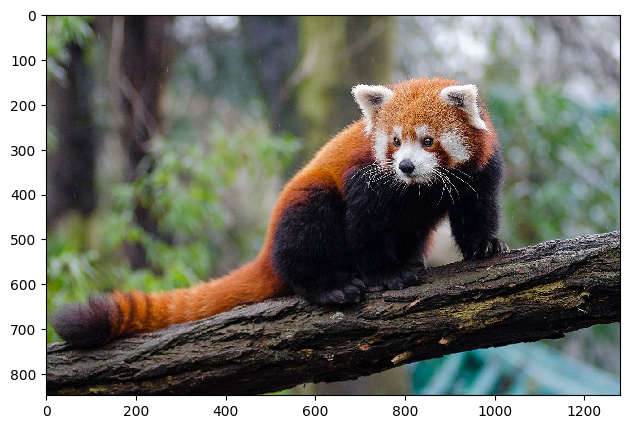

In [22]:
#Before compression and decopression
io.imshow(images["redPanda"])

/usr/local/lib/python3.10/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:150: UserWarning: Low image data range; displaying image with stretched contrast.
  lo, hi, cmap = _get_display_range(image)


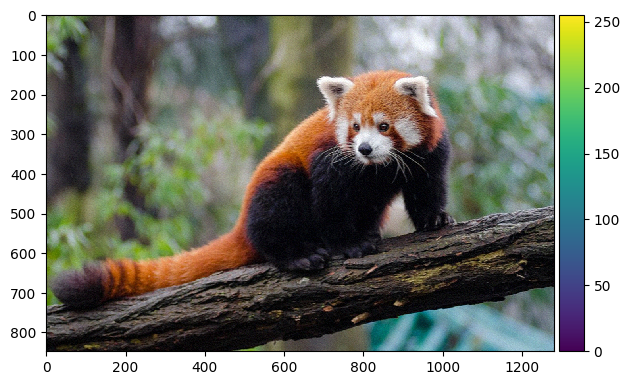

In [24]:


"""
Funkcja, która stosuje podaną w argumencie funkcję na każdy kolor obrazu
(czyli następuje np.destack i stosowanie funkcji na jażdum kanale)
argumenty: funcka nakładana, obraz, oraz Arbitrary Arguments, Arbitrary Keyword Arguments (dodatkowe parametry,dodatkowe parametry kluczowe)
"""
def apply_for_every_channel(function,image,*args,**kargs):
  return np.dstack([function(image[:, :, channel], *args, **kargs) for channel in range(3)])


def compress_and_decompress(image,compressionValue):

    transformed = np.fft.fft2(image)

    coefficients = np.sort(np.abs(transformed.reshape(-1)))  # sort by magnitude

    threshold = coefficients[int(compressionValue * len(coefficients))]
    indices = np.abs(transformed) > threshold

    decompressed = transformed * indices
    transform = np.abs(np.fft.ifft2(decompressed))

    return transform

decompressed_image = apply_for_every_channel(compress_and_decompress, images["redPanda"],0.90)

_ = io.imshow(np.clip(decompressed_image.astype(int), 0, 255))



#Odszumianie
https://scipy-lectures.org/intro/scipy/auto_examples/solutions/plot_fft_image_denoise.html

Text(0.5, 1.0, 'Reconstructed Image')

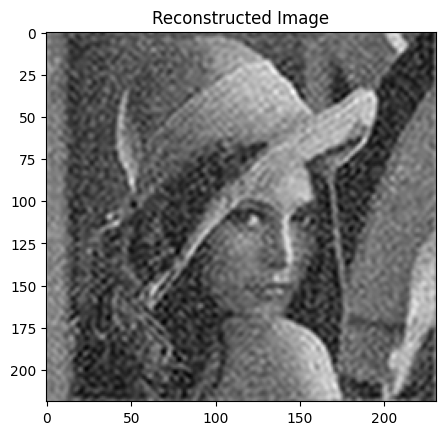

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import fftpack
from matplotlib.colors import LogNorm
from skimage import color



"""
Define the fraction of coefficients (in each direction) we keep: keep_fraction = 0.1
all ff a copy of the original transform. Numpy arrays have a copy method for this purpose.
Set r and c to be the number of rows and columns of the array.r, c = im_fft2.shape
# Set to zero all rows with indices between r*keep_fraction and r*(1-keep_fraction):
# Similarly with the columns:
"""

image = images["images"].astype(float)
gray_image = color.rgb2gray(image)



im_fft = fftpack.fft2(gray_image)

keep_fraction = 0.2
im_fft2 = im_fft.copy()
r, c = im_fft2.shape
im_fft2[int(r*keep_fraction):int(r*(1-keep_fraction))] = 0
im_fft2[:, int(c*keep_fraction):int(c*(1-keep_fraction))] = 0


im_new = fftpack.ifft2(im_fft2).real

plt.figure()
plt.imshow(im_new, plt.cm.gray)
plt.title('Reconstructed Image')
